In [61]:
import pandas as pd 
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
# from ga_inverse import *

# Create TypeList

In [62]:
datas = './TrainData.xlsx'

df=pd.read_excel(datas)
df['logD'] = np.log10(df['diffusivity'])

df2=df[[ 'type', 'gas', 'aperture', 'MetalNum', 'MetalMass', 'size - van der Waals (Å)','mass', 'ascentricF', 'logD', 'size - kinetic diameter (Å)', 'ionicRad', 
       'Μ-N_lff', 'Μ-N_kFF', 'MetalCharge',
       'σ_1', 'e_1', 'linker_length1', 'linker_length2',
       'linker_length3', 'linker_mass1', 'linker_mass2', 'linker_mass3',
       'func1_length', 'func2_length', 'func3_length', 'func1_mass',  
       'func2_mass', 'func3_mass', 'func1_charge', 'func2_charge',
       'func3_charge']]

df2=df2.rename(columns={'size - van der Waals (Å)':'diameter', 'size - kinetic diameter (Å)':'kdiameter', 'apertureAtom_e':'e' })

df2 = df2.dropna()

df2=df2.reset_index(drop=True)

df2.type.unique()

TypeList = df2.type.unique()
TypeList

array(['CdIF-1', 'ZIF-8', 'ZIF-Cu', 'ZIF-67', 'BeIF-1', 'ZIF-7-8',
       'Co-ZIF-7-8', 'Cl-ZIF-7-8', 'Br-ZIF-7-8', 'Be-ZIF-7-8', 'Br-ZIF-8',
       'Im-ZIF-8 (1)', 'Im-ZIF-8 (2)', 'Cd-Cl-ZIF-7-8', 'ZIF8_Mg',
       'ZIF8_Mn', 'Cd-Br-ZIF-7-8', 'Cl-ZIF-8', 'Im-ZIF-8 (3)',
       'Br-ZIF8-Co', 'Co-Br-ZIF-7-8', 'Co-Cl-ZIF-7-8', 'tetr-ZIF8',
       'tetr-ZIF8_Be', 'tetr-ZIF8_Co', 'I-ZIF-7-8', 'F-ZIF-7-8',
       'Co-F-ZIF-7-8', 'Be-F-ZIF-7-8', 'Cu-ZIF-7-8', 'Cu-F-ZIF-7-8',
       'Cu-Cl-ZIF-7-8', 'Co-I-ZIF-7-8', 'NH2-tetrz', 'NH2_tetrz_Be',
       'NH2-tetrz_Co', 'dClm_Zn', 'dClm_Co', 'dClm_Be', 'dClm_Cd',
       'dClm_Mg', 'Be-I-ZIF-7-8', 'CHO_Zn', 'tetr-ZIF8_Cu', 'dClm_Cu',
       'dFm_Zn', 'dBrm_Zn', 'dIm_Zn', 'Cu-Br-zif-7-8', 'Cu-I-zif-7-8',
       'Mg-zif-7-8', 'Mg-Br-zif-7-8', 'Mg-I-zif-7-8', 'Mn-zif-7-8',
       'Mn-Br-zif-7-8', 'Mn-I-zif-7-8', 'dBrm_Be', 'dBrm_Co', 'dBrm_Cu',
       'dBrm_Cd', 'dBrm_Mg', 'dFm_Co', 'dFm_Cd', 'dFm_Mg', 'dFm_Cu',
       'dIm_Be', 'dIm_Co', 'dIm_Cu', '

# Exchaustive search

In [3]:
datas2 = './results.csv'

In [4]:
df3=pd.read_csv(datas2, header=None)

In [5]:
df3=df3.rename(columns={0: 'ΜetalNum', 1: 'linker_length1', 2: 'func1_length', 3:'logD1', 4:'logD2', 5: 'Ratio'})

In [6]:
df3 = df3[['ΜetalNum', 'linker_length1', 'func1_length']]

In [63]:
def extract_pca_data_space(MOF_vectors, gas_name, trained_model_for_specific_gas):

    # solution = np.asanyarray(MOF_vectors[['MetalNum', 'linker_length1', 'func1_length']])

    if gas_name == 'propylene':
        diameter = np.array([4.03])
        mass = np.array([42.08])
        ascentricF = np.array([0.142])
        kdiameter = np.array([4.5])
    elif gas_name == 'co2':
        diameter = np.array([3.24])
        mass = np.array([44.01])
        ascentricF = np.array([0.225])
        kdiameter = np.array([3.3])
    
    # Provided dictionaries
    linker_length1 = {
        3.66: {'linker_mass1': 83, 'σ_1': 0.325, 'e_1': 0.7112, 'linker_length2': 3.66, 'linker_mass2': 83, 'σ_2': 0.325,
            'e_2': 0.7112, 'linker_length3': 3.66, 'linker_mass3': 83, 'σ_3': 0.325, 'e_3': 0.7112},
        4.438: {'linker_mass1': 81, 'σ_1': 0.25, 'e_1': 0.0627, 'linker_length2': 4.438, 'linker_mass2': 81, 'σ_2': 0.25,
                'e_2': 0.0627, 'linker_length3': 4.438, 'linker_mass3': 81, 'σ_3': 0.25, 'e_3': 0.0627},
        4.86: {'linker_mass1': 101.98, 'σ_1': 0.285, 'e_1': 0.255, 'linker_length2': 4.86, 'linker_mass2': 101.98, 'σ_2': 0.285,
            'e_2': 0.255, 'linker_length3': 4.86, 'linker_mass3': 101.98, 'σ_3': 0.285, 'e_3': 0.255},
        5.7: {'linker_mass1': 134.906, 'σ_1': 0.34, 'e_1': 1.2552, 'linker_length2': 5.7, 'linker_mass2': 134.906, 'σ_2': 0.34,
            'e_2': 1.2552, 'linker_length3': 5.7, 'linker_mass3': 134.906, 'σ_3': 0.34, 'e_3': 1.2552},
        6.01: {'linker_mass1': 223.8, 'σ_1': 0.4, 'e_1': 1.8731, 'linker_length2': 6.01, 'linker_mass2': 223.8, 'σ_2': 0.4,
            'e_2': 1.8731, 'linker_length3': 6.01, 'linker_mass3': 223.8, 'σ_3': 0.4, 'e_3': 1.8731},
        6.41: {'linker_mass1': 317.8, 'σ_1': 0.367, 'e_1': 2.4267, 'linker_length2': 6.41, 'linker_mass2': 317.8, 'σ_2': 0.367,
            'e_2': 2.4267, 'linker_length3': 6.01, 'linker_mass3': 223.8, 'σ_3': 0.367, 'e_3': 2.4267}
    }

    func1_length = {
        2.278: {'func1_mass': 1., 'func2_length': 2.278, 'func2_mass': 1., 'func3_length': 2.278, 'func3_mass': 1.},
        3.54: {'func1_mass': 35.45, 'func2_length': 3.54, 'func2_mass': 35.45, 'func3_length': 3.54, 'func3_mass': 35.45},
        3.78: {'func1_mass': 15., 'func2_length': 3.78, 'func2_mass': 15., 'func3_length': 3.78, 'func3_mass': 15.},
        3.85: {'func1_mass': 79.9, 'func2_length': 3.85, 'func2_mass': 79.9, 'func3_length': 3.85, 'func3_mass': 79.9},
        3.927: {'func1_mass': 16., 'func2_length': 3.927, 'func2_mass': 16., 'func3_length': 3.927, 'func3_mass': 16.},
        4.093: {'func1_mass': 31., 'func2_length': 4.093, 'func2_mass': 31., 'func3_length': 4.093, 'func3_mass': 31.}
    }

    MetalNum = {
        4: {'ionicRad': 41, 'MetalMass': 9.012},
        29: {'ionicRad': 71, 'MetalMass': 63.456},
        12: {'ionicRad': 71, 'MetalMass': 24.305},
        27: {'ionicRad': 72, 'MetalMass': 58.930},
        30: {'ionicRad': 74, 'MetalMass': 65.380},
        25: {'ionicRad': 80, 'MetalMass': 54.938},
        48: {'ionicRad': 92, 'MetalMass': 112.411}
    }

    # Function to map values from dictionaries to create additional columns
    def map_values(row):
        metal_num_info = MetalNum[row['MetalNum']]
        linker_info = linker_length1[row['linker_length1']]
        func_info = func1_length[row['func1_length']]
        
        return pd.Series({
            'linker_mass1': linker_info['linker_mass1'],
            'σ_1': linker_info['σ_1'],
            'e_1': linker_info['e_1'],
            'linker_length2': linker_info['linker_length2'],
            'linker_mass2': linker_info['linker_mass2'],
            'σ_2': linker_info['σ_2'],
            'e_2': linker_info['e_2'],
            'linker_length3': linker_info['linker_length3'],
            'linker_mass3': linker_info['linker_mass3'],
            'σ_3': linker_info['σ_3'],
            'e_3': linker_info['e_3'],
            'func1_mass': func_info['func1_mass'],
            'func2_length': func_info['func2_length'],
            'func2_mass': func_info['func2_mass'],
            'func3_length': func_info['func3_length'],
            'func3_mass': func_info['func3_mass'],
            'ionicRad': metal_num_info['ionicRad'],
            'MetalMass': metal_num_info['MetalMass']
        })

    # Apply the mapping function to create new columns in the DataFrame
    new_columns = MOF_vectors.apply(map_values, axis=1)

    # Concatenate the new columns with the original DataFrame
    new_df = pd.concat([MOF_vectors, new_columns], axis=1)

    # Reset the index to avoid duplicate rows
    new_df = new_df.reset_index(drop=True)

    new_df = new_df[['ionicRad', 
                    'MetalNum',
                    'MetalMass',
        'σ_1', 'e_1',
        'σ_2', 'e_2',
        'σ_3', 'e_3',
        'linker_length1', 'linker_length2', 'linker_length3',
        'linker_mass1', 'linker_mass2', 'linker_mass3',
        'func1_length', 'func2_length', 'func3_length', 
        'func1_mass', 'func2_mass', 'func3_mass']]

    # Add new columns to the DataFrame with constant values
    new_df['diameter'] = diameter[0]
    new_df['mass'] = mass[0]
    new_df['ascentricF'] = ascentricF[0]
    new_df['kdiameter'] = kdiameter[0]

    # print("Number of NaN or infinite values in new_df:", np.sum(np.isnan(new_df)) + np.sum(np.isinf(new_df)))
    print("Number of unique rows in new_df:", len(np.unique(new_df, axis=0)))
    new_df=new_df.drop_duplicates()
    MOF_and_gas_vector=new_df.values
    MOFs=MOF_vectors[['MetalNum', 'linker_length1', 'func1_length']].drop_duplicates()

    # After creating MOF_and_gas_vector, add the following code to check for NaN or infinite values
    print("Number of NaN or infinite values in MOF_and_gas_vector:", np.sum(np.isnan(MOF_and_gas_vector)) + np.sum(np.isinf(MOF_and_gas_vector)))

    # Before applying PCA, add the following code to scale the data and check for NaN or infinite values again
    X_scaled = StandardScaler().fit_transform(MOFs)
    print("Number of NaN or infinite values in X_scaled:", np.sum(np.isnan(X_scaled)) + np.sum(np.isinf(X_scaled)))
    duplicates_mask = new_df.duplicated()
    print("Number of duplicates in MOF_and_gas_vector:", np.sum(duplicates_mask))   
    # Apply PCA to the input data
    X_scaled = StandardScaler().fit_transform(MOFs)
    pca = PCA(n_components=2).fit(X_scaled)
    
   
    # For each possible MOF
    # Call the model
    y_pred = trained_model_for_specific_gas.predict(MOF_and_gas_vector)
    print("Number of unique rows in y_pred:", len(np.unique(y_pred, axis=0)))

    # Map X to the new space
    MOF_and_gas_vector_in_PCA_space = pca.transform(X_scaled)
    # After applying PCA, add the following code to check for any duplicate rows in the PCA-transformed data
    print("Number of unique rows in MOF_and_gas_vector_in_PCA_space:", len(np.unique(MOF_and_gas_vector_in_PCA_space, axis=0)))
    print("Number of NaN or infinite values in MOF_and_gas_vector_in_PCA_space:", np.sum(np.isnan(MOF_and_gas_vector_in_PCA_space)) + np.sum(np.isinf(MOF_and_gas_vector_in_PCA_space)))
    print("First few rows of MOF_and_gas_vector_in_PCA_space:")
    print(MOF_and_gas_vector_in_PCA_space[:5])
    # Create DataFrame for PCA components
    final_data_pca = pd.DataFrame(columns=['PC1', 'PC2'])
    final_data_pca['PC1'] = MOF_and_gas_vector_in_PCA_space[:, 0]
    final_data_pca['PC2'] = MOF_and_gas_vector_in_PCA_space[:, 1]

    # Create DataFrame for predicted values
    final_data_output = pd.DataFrame(columns=['output'])
    final_data_output['output'] = y_pred
    print("First few model predictions (y_pred):")
    print(y_pred[:5])
    # Concatenate the DataFrames along columns (axis=1)
    final_data = pd.concat([final_data_pca, final_data_output], axis=1)

    return final_data
    
def get_trained_model(training_data):
    datas = training_data # './TrainData.xlsx'
    df=pd.read_excel(datas)
    df['logD'] = np.log10(df['diffusivity'])

    df2=df[[ 'type', 'gas', 'aperture', 'MetalNum', 'MetalMass', 'size - van der Waals (Å)','mass', 'ascentricF', 'logD', 'size - kinetic diameter (Å)', 'ionicRad', 
       'Μ-N_lff', 'Μ-N_kFF', 'MetalCharge',
       'σ_1', 'e_1', 'σ_2', 'e_2', 'σ_3', 'e_3', 'linker_length1', 'linker_length2',
       'linker_length3', 'linker_mass1', 'linker_mass2', 'linker_mass3',
       'func1_length', 'func2_length', 'func3_length', 'func1_mass',  
       'func2_mass', 'func3_mass', 'func1_charge', 'func2_charge',
       'func3_charge']]
    
    df2=df2.rename(columns={'size - van der Waals (Å)':'diameter', 'size - kinetic diameter (Å)':'kdiameter' })
    df2 = df2.dropna()
    df2=df2.reset_index(drop=True)

    x = np.asanyarray(df2[[
    'ionicRad',
    'MetalNum',
    'MetalMass',
    'σ_1', 'e_1',
    'σ_2', 'e_2',
    'σ_3', 'e_3',
    'linker_length1', 'linker_length2', 'linker_length3',
    'linker_mass1', 'linker_mass2', 'linker_mass3',
    'func1_length', 'func2_length', 'func3_length', 
    'func1_mass', 'func2_mass', 'func3_mass',
    'diameter',
    'mass',
    'ascentricF',
    'kdiameter'
                      ]])

    y = np.array(df2[['logD']])

    XGBR = XGBRegressor(n_estimators=500, max_depth=5, eta=0.07, subsample=0.75, colsample_bytree=0.7, reg_lambda=0.4, reg_alpha=0.13,
                    # n_jobs=6,
                    nthread=6,
                    random_state=6410
                   )
    
    model = XGBR.fit(x, y)
    
    return model

def get_exhaustive_search_data():
    datas = './results.csv'
    df=pd.read_csv(datas, header=None)
    df = df.rename(columns={0: 'MetalNum', 1: 'linker_length1', 2: 'func1_length', 3:'logD1', 4:'logD2', 5: 'Ratio'}) # TODO: Fix
    print("Number of unique rows in df:", len(np.unique(df, axis=0)))
    return df

In [8]:
# For data size of (5, 10, 100)
    # Get the corresponding subset of training data
    # Train the model (get_trained_model)
    # Create MOF vectors containing all the info required by the model
    # Get gas vector
    # Call extract pca data space
    # Draw the space

In [9]:
# extract_pca_data_space(MOF_vectors, gas_name, trained_model_for_specific_gas)

extract_pca_data_space(get_exhaustive_search_data(), "co2", get_trained_model("./TrainData.xlsx"))

Number of unique rows in df: 140
Number of unique rows in new_df: 140
Number of NaN or infinite values in MOF_and_gas_vector: 0
Number of NaN or infinite values in X_scaled: 0
Number of duplicates in MOF_and_gas_vector: 0
Number of unique rows in y_pred: 140
Number of unique rows in MOF_and_gas_vector_in_PCA_space: 140
Number of NaN or infinite values in MOF_and_gas_vector_in_PCA_space: 0
First few rows of MOF_and_gas_vector_in_PCA_space:
[[-1.61470230e+00  2.34622455e-02]
 [-9.99577613e-01  2.34622455e-02]
 [-1.58603289e-18  2.34622455e-02]
 [ 1.53781171e-01  2.34622455e-02]
 [ 3.07562343e-01  2.34622455e-02]]
First few model predictions (y_pred):
[-12.267225  -8.942143  -8.704342  -9.591481 -10.263219]


,PC1,PC2,output
0,-1.614702e+00,0.023462,-12.267225
1,-9.995776e-01,0.023462,-8.942143
2,-1.586033e-18,0.023462,-8.704342
3,1.537812e-01,0.023462,-9.591481
4,3.075623e-01,0.023462,-10.263219
...,...,...,...
135,-1.586033e-18,0.097386,-8.894389
136,1.537812e-01,0.097386,-9.306361
137,3.075623e-01,0.097386,-9.170129
138,3.844529e-01,0.097386,-9.468863


Number of unique rows in df: 140
Number of unique rows in new_df: 140
Number of NaN or infinite values in MOF_and_gas_vector: 0
Number of NaN or infinite values in X_scaled: 0
Number of duplicates in MOF_and_gas_vector: 0
Number of unique rows in y_pred: 140
Number of unique rows in MOF_and_gas_vector_in_PCA_space: 140
Number of NaN or infinite values in MOF_and_gas_vector_in_PCA_space: 0
First few rows of MOF_and_gas_vector_in_PCA_space:
[[-1.61470230e+00  2.34622455e-02]
 [-9.99577613e-01  2.34622455e-02]
 [-1.58603289e-18  2.34622455e-02]
 [ 1.53781171e-01  2.34622455e-02]
 [ 3.07562343e-01  2.34622455e-02]]
First few model predictions (y_pred):
[-12.267225  -8.942143  -8.704342  -9.591481 -10.263219]
Number of rows in pca_df: 140


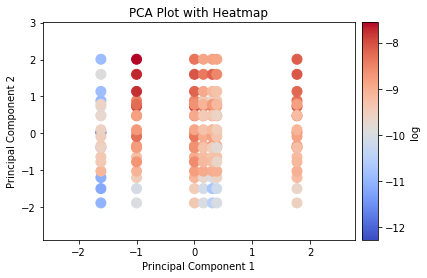

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming you have the output/target property stored in 'output_property'
# Let's say you have a DataFrame called 'pca_df' with the two PCA components
pca_df = extract_pca_data_space(get_exhaustive_search_data(), "co2", get_trained_model("./TrainData.xlsx"))
print("Number of rows in pca_df:", len(pca_df))
# Extract the PCA components as a 2D array
pca_array = pca_df[['PC1', 'PC2']].values

# Extract the output property as a 1D array
output_property = pca_df['output'].values

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the scatter plot of PCA axes with larger point size
scatter = ax.scatter(pca_array[:, 0], pca_array[:, 1], c=output_property, cmap='coolwarm', s=100)  # Increase s to make points larger

# Set the labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Heatmap')

# Set the limits of the axes to increase the range
ax.set_xlim(pca_array[:, 0].min() - 1, pca_array[:, 0].max() + 1)  # Increase the range by 1 on each side
ax.set_ylim(pca_array[:, 1].min() - 1, pca_array[:, 1].max() + 1)  # Increase the range by 1 on each side

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
cbar = plt.colorbar(scatter, cax=cax, label='log')

# Show the plot
plt.show()


# Interpolation

# Define my functions to loop through a varying/increasing training dataset

In [64]:
def extract_pca_data_space(MOF_vectors, gas_name, trained_model_for_specific_gas):

    # solution = np.asanyarray(MOF_vectors[['MetalNum', 'linker_length1', 'func1_length']])

    if gas_name == 'propylene':
        diameter = np.array([4.03])
        mass = np.array([42.08])
        ascentricF = np.array([0.142])
        kdiameter = np.array([4.5])
    elif gas_name == 'co2':
        diameter = np.array([3.24])
        mass = np.array([44.01])
        ascentricF = np.array([0.225])
        kdiameter = np.array([3.3])
    
    # Provided dictionaries
    linker_length1 = {
        3.66: {'linker_mass1': 83, 'σ_1': 0.325, 'e_1': 0.7112, 'linker_length2': 3.66, 'linker_mass2': 83, 'σ_2': 0.325,
            'e_2': 0.7112, 'linker_length3': 3.66, 'linker_mass3': 83, 'σ_3': 0.325, 'e_3': 0.7112},
        4.438: {'linker_mass1': 81, 'σ_1': 0.25, 'e_1': 0.0627, 'linker_length2': 4.438, 'linker_mass2': 81, 'σ_2': 0.25,
                'e_2': 0.0627, 'linker_length3': 4.438, 'linker_mass3': 81, 'σ_3': 0.25, 'e_3': 0.0627},
        4.86: {'linker_mass1': 101.98, 'σ_1': 0.285, 'e_1': 0.255, 'linker_length2': 4.86, 'linker_mass2': 101.98, 'σ_2': 0.285,
            'e_2': 0.255, 'linker_length3': 4.86, 'linker_mass3': 101.98, 'σ_3': 0.285, 'e_3': 0.255},
        5.7: {'linker_mass1': 134.906, 'σ_1': 0.34, 'e_1': 1.2552, 'linker_length2': 5.7, 'linker_mass2': 134.906, 'σ_2': 0.34,
            'e_2': 1.2552, 'linker_length3': 5.7, 'linker_mass3': 134.906, 'σ_3': 0.34, 'e_3': 1.2552},
        6.01: {'linker_mass1': 223.8, 'σ_1': 0.4, 'e_1': 1.8731, 'linker_length2': 6.01, 'linker_mass2': 223.8, 'σ_2': 0.4,
            'e_2': 1.8731, 'linker_length3': 6.01, 'linker_mass3': 223.8, 'σ_3': 0.4, 'e_3': 1.8731},
        6.41: {'linker_mass1': 317.8, 'σ_1': 0.367, 'e_1': 2.4267, 'linker_length2': 6.41, 'linker_mass2': 317.8, 'σ_2': 0.367,
            'e_2': 2.4267, 'linker_length3': 6.01, 'linker_mass3': 223.8, 'σ_3': 0.367, 'e_3': 2.4267}
    }

    func1_length = {
        2.278: {'func1_mass': 1., 'func2_length': 2.278, 'func2_mass': 1., 'func3_length': 2.278, 'func3_mass': 1.},
        3.54: {'func1_mass': 35.45, 'func2_length': 3.54, 'func2_mass': 35.45, 'func3_length': 3.54, 'func3_mass': 35.45},
        3.78: {'func1_mass': 15., 'func2_length': 3.78, 'func2_mass': 15., 'func3_length': 3.78, 'func3_mass': 15.},
        3.85: {'func1_mass': 79.9, 'func2_length': 3.85, 'func2_mass': 79.9, 'func3_length': 3.85, 'func3_mass': 79.9},
        3.927: {'func1_mass': 16., 'func2_length': 3.927, 'func2_mass': 16., 'func3_length': 3.927, 'func3_mass': 16.},
        4.093: {'func1_mass': 31., 'func2_length': 4.093, 'func2_mass': 31., 'func3_length': 4.093, 'func3_mass': 31.}
    }

    MetalNum = {
        4: {'ionicRad': 41, 'MetalMass': 9.012},
        29: {'ionicRad': 71, 'MetalMass': 63.456},
        12: {'ionicRad': 71, 'MetalMass': 24.305},
        27: {'ionicRad': 72, 'MetalMass': 58.930},
        30: {'ionicRad': 74, 'MetalMass': 65.380},
        25: {'ionicRad': 80, 'MetalMass': 54.938},
        48: {'ionicRad': 92, 'MetalMass': 112.411}
    }

    # Function to map values from dictionaries to create additional columns
    def map_values(row):
        metal_num_info = MetalNum[row['MetalNum']]
        linker_info = linker_length1[row['linker_length1']]
        func_info = func1_length[row['func1_length']]
        
        return pd.Series({
            'linker_mass1': linker_info['linker_mass1'],
            'σ_1': linker_info['σ_1'],
            'e_1': linker_info['e_1'],
            'linker_length2': linker_info['linker_length2'],
            'linker_mass2': linker_info['linker_mass2'],
            'σ_2': linker_info['σ_2'],
            'e_2': linker_info['e_2'],
            'linker_length3': linker_info['linker_length3'],
            'linker_mass3': linker_info['linker_mass3'],
            'σ_3': linker_info['σ_3'],
            'e_3': linker_info['e_3'],
            'func1_mass': func_info['func1_mass'],
            'func2_length': func_info['func2_length'],
            'func2_mass': func_info['func2_mass'],
            'func3_length': func_info['func3_length'],
            'func3_mass': func_info['func3_mass'],
            'ionicRad': metal_num_info['ionicRad'],
            'MetalMass': metal_num_info['MetalMass']
        })

    # Apply the mapping function to create new columns in the DataFrame
    new_columns = MOF_vectors.apply(map_values, axis=1)

    # Concatenate the new columns with the original DataFrame
    new_df = pd.concat([MOF_vectors, new_columns], axis=1)

    # Reset the index to avoid duplicate rows
    new_df = new_df.reset_index(drop=True)

    new_df = new_df[['ionicRad', 
                    'MetalNum',
                    'MetalMass',
        'σ_1', 'e_1',
        'σ_2', 'e_2',
        'σ_3', 'e_3',
        'linker_length1', 'linker_length2', 'linker_length3',
        'linker_mass1', 'linker_mass2', 'linker_mass3',
        'func1_length', 'func2_length', 'func3_length', 
        'func1_mass', 'func2_mass', 'func3_mass']]

    # Add new columns to the DataFrame with constant values
    new_df['diameter'] = diameter[0]
    new_df['mass'] = mass[0]
    new_df['ascentricF'] = ascentricF[0]
    new_df['kdiameter'] = kdiameter[0]

    # print("Number of NaN or infinite values in new_df:", np.sum(np.isnan(new_df)) + np.sum(np.isinf(new_df)))
    print("Number of unique rows in new_df:", len(np.unique(new_df, axis=0)))
    new_df=new_df.drop_duplicates()
    MOF_and_gas_vector=new_df.values
    MOFs=MOF_vectors[['MetalNum', 'linker_length1', 'func1_length']].drop_duplicates()

    # After creating MOF_and_gas_vector, add the following code to check for NaN or infinite values
    print("Number of NaN or infinite values in MOF_and_gas_vector:", np.sum(np.isnan(MOF_and_gas_vector)) + np.sum(np.isinf(MOF_and_gas_vector)))

    # Before applying PCA, add the following code to scale the data and check for NaN or infinite values again
    X_scaled = StandardScaler().fit_transform(MOFs)
    print("Number of NaN or infinite values in X_scaled:", np.sum(np.isnan(X_scaled)) + np.sum(np.isinf(X_scaled)))
    duplicates_mask = new_df.duplicated()
    print("Number of duplicates in MOF_and_gas_vector:", np.sum(duplicates_mask))   
    # Apply PCA to the input data
    X_scaled = StandardScaler().fit_transform(MOFs)
    pca = PCA(n_components=2).fit(X_scaled)
    
   
    # For each possible MOF
    # Call the model
    y_pred = trained_model_for_specific_gas.predict(MOF_and_gas_vector)
    print("Number of unique rows in y_pred:", len(np.unique(y_pred, axis=0)))

    # Map X to the new space
    MOF_and_gas_vector_in_PCA_space = pca.transform(X_scaled)
    # After applying PCA, add the following code to check for any duplicate rows in the PCA-transformed data
    print("Number of unique rows in MOF_and_gas_vector_in_PCA_space:", len(np.unique(MOF_and_gas_vector_in_PCA_space, axis=0)))
    print("Number of NaN or infinite values in MOF_and_gas_vector_in_PCA_space:", np.sum(np.isnan(MOF_and_gas_vector_in_PCA_space)) + np.sum(np.isinf(MOF_and_gas_vector_in_PCA_space)))
    print("First few rows of MOF_and_gas_vector_in_PCA_space:")
    print(MOF_and_gas_vector_in_PCA_space[:5])
    # Create DataFrame for PCA components
    final_data_pca = pd.DataFrame(columns=['PC1', 'PC2'])
    final_data_pca['PC1'] = MOF_and_gas_vector_in_PCA_space[:, 0]
    final_data_pca['PC2'] = MOF_and_gas_vector_in_PCA_space[:, 1]

    # Create DataFrame for predicted values
    final_data_output = pd.DataFrame(columns=['output'])
    final_data_output['output'] = y_pred
    print("First few model predictions (y_pred):")
    print(y_pred[:5])
    # Concatenate the DataFrames along columns (axis=1)
    final_data = pd.concat([final_data_pca, final_data_output], axis=1)

    return final_data
    
def get_trained_model(training_data, randomized_order: bool, perc=10):
    datas = training_data # './TrainData.xlsx'
    df=pd.read_excel(datas)
    df['logD'] = np.log10(df['diffusivity'])

    df2=df[[ 'type', 'gas', 'aperture', 'MetalNum', 'MetalMass', 'size - van der Waals (Å)','mass', 'ascentricF', 'logD', 'size - kinetic diameter (Å)', 'ionicRad', 
       'Μ-N_lff', 'Μ-N_kFF', 'MetalCharge',
       'σ_1', 'e_1', 'σ_2', 'e_2', 'σ_3', 'e_3', 'linker_length1', 'linker_length2',
       'linker_length3', 'linker_mass1', 'linker_mass2', 'linker_mass3',
       'func1_length', 'func2_length', 'func3_length', 'func1_mass',  
       'func2_mass', 'func3_mass', 'func1_charge', 'func2_charge',
       'func3_charge']]
    
    df2=df2.rename(columns={'size - van der Waals (Å)':'diameter', 'size - kinetic diameter (Å)':'kdiameter' })
    df2 = df2.dropna()
    df2=df2.reset_index(drop=True)

    newDf = None

    # Create a list containing a randomized or serial version of the training instance indices
    if randomized_order:
        percentage = perc  # Adjust the percentage
        random_sample = np.random.choice(TypeList, size=int(len(TypeList) * percentage / 100), replace=False)

        # Create a new DataFrame containing only the rows with 'type' values in the TypeList array
        newDf = df2[df2['type'].isin(random_sample)]
    else:
        percentage = perc  # Adjust the percentage
        start_idx = 0
        end_idx = int(len(TypeList) * percentage / 100)
        sequential_sample = TypeList[start_idx:end_idx]

        # Create a new DataFrame containing only the rows with 'type' values in the sequential_sample array
        newDf = df2[df2['type'].isin(sequential_sample)]


    x = np.asanyarray(newDf[[
    'ionicRad',
    'MetalNum',
    'MetalMass',
    'σ_1', 'e_1',
    'σ_2', 'e_2',
    'σ_3', 'e_3',
    'linker_length1', 'linker_length2', 'linker_length3',
    'linker_mass1', 'linker_mass2', 'linker_mass3',
    'func1_length', 'func2_length', 'func3_length', 
    'func1_mass', 'func2_mass', 'func3_mass',
    'diameter',
    'mass',
    'ascentricF',
    'kdiameter'
                    ]])

    y = np.array(newDf[['logD']])

    XGBR = XGBRegressor(n_estimators=500, max_depth=5, eta=0.07, subsample=0.75, colsample_bytree=0.7, reg_lambda=0.4, reg_alpha=0.13,
                    # n_jobs=6,
                    nthread=6,
                    random_state=6410
                )
    
    model = XGBR.fit(x, y)
        
    return model

def get_exhaustive_search_data():
    datas = './results.csv'
    df=pd.read_csv(datas, header=None)
    df = df.rename(columns={0: 'MetalNum', 1: 'linker_length1', 2: 'func1_length', 3:'logD1', 4:'logD2', 5: 'Ratio'}) # TODO: Fix
    print("Number of unique rows in df:", len(np.unique(df, axis=0)))
    return df

In [65]:
extract_pca_data_space(get_exhaustive_search_data(), "co2", get_trained_model("./TrainData.xlsx", False, 10))

Number of unique rows in df: 140
Number of unique rows in new_df: 140
Number of NaN or infinite values in MOF_and_gas_vector: 0
Number of NaN or infinite values in X_scaled: 0
Number of duplicates in MOF_and_gas_vector: 0
Number of unique rows in y_pred: 21
Number of unique rows in MOF_and_gas_vector_in_PCA_space: 140
Number of NaN or infinite values in MOF_and_gas_vector_in_PCA_space: 0
First few rows of MOF_and_gas_vector_in_PCA_space:
[[-1.61470230e+00  2.34622455e-02]
 [-9.99577613e-01  2.34622455e-02]
 [-1.58603289e-18  2.34622455e-02]
 [ 1.53781171e-01  2.34622455e-02]
 [ 3.07562343e-01  2.34622455e-02]]
First few model predictions (y_pred):
[-10.593499  -9.618229  -9.211783  -9.243371  -9.503055]


,PC1,PC2,output
0,-1.614702e+00,0.023462,-10.593499
1,-9.995776e-01,0.023462,-9.618229
2,-1.586033e-18,0.023462,-9.211783
3,1.537812e-01,0.023462,-9.243371
4,3.075623e-01,0.023462,-9.503055
...,...,...,...
135,-1.586033e-18,0.097386,-11.601877
136,1.537812e-01,0.097386,-11.744646
137,3.075623e-01,0.097386,-11.709088
138,3.844529e-01,0.097386,-11.589353


In [ ]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable

# # Assuming you have the output/target property stored in 'output_property'
# # Let's say you have a DataFrame called 'pca_df' with the two PCA components
# pca_df = extract_pca_data_space(get_exhaustive_search_data(), "co2", get_trained_model("./TrainData.xlsx", False, 10))
# print("Number of rows in pca_df:", len(pca_df))
# # Extract the PCA components as a 2D array
# pca_array = pca_df[['PC1', 'PC2']].values

# # Extract the output property as a 1D array
# output_property = pca_df['output'].values

# # Create a figure and axes
# fig, ax = plt.subplots()

# # Plot the scatter plot of PCA axes with larger point size
# scatter = ax.scatter(pca_array[:, 0], pca_array[:, 1], c=output_property, cmap='coolwarm', s=100)  # Increase s to make points larger

# # Set the labels and title
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA Plot with Heatmap')

# # Create a colorbar
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='5%', pad=0.1)
# cbar = plt.colorbar(scatter, cax=cax, label='log')

# #Save the plot
# plt.savefig('PCA_20.png', bbox_inches='tight')
# # Show the plot
# plt.show()

# Define my PCA Plotting Function

In [66]:
import scipy.interpolate

def plot_pca_data(pca_df, title, randomized_order: bool, number):
    # Extract the PCA components as a 2D array
    pca_array = pca_df[['PC1', 'PC2']].values

    # Extract the output property as a 1D array
    output_property = pca_df['output'].values

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Plot the scatter plot of PCA axes with larger point size and thin edge lines
    scatter = ax.scatter(pca_array[:, 0], pca_array[:, 1], c=output_property, cmap='coolwarm', s=100, linewidths=0.2, edgecolors='black')

    # Set the labels and title
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)

    # Increase the scale of both axes
    plt.xlim(pca_array[:, 0].min() - 0.2, pca_array[:, 0].max() + 0.2)
    plt.ylim(pca_array[:, 1].min() - 0.2, pca_array[:, 1].max() + 0.2)

    # Create a colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    
    # Get the minimum and maximum values of the output_property for the interpolation range
    min_output_property = output_property.min()
    max_output_property = output_property.max() 

    # Perform the interpolation using the same range as the original points
    sorted_x_indices = pca_array[:, 0].argsort()
    sorted_x = pca_array[:, 0][sorted_x_indices]
    sorted_y = pca_array[:, 1][sorted_x_indices]
    sorted_output_property = output_property[sorted_x_indices]

    interp_func = scipy.interpolate.RectBivariateSpline(sorted_x, sorted_y, sorted_output_property)
    interp_output_property = interp_func(sorted_x, sorted_y)

    # Plot the interpolated heatmap
    heatmap = ax.imshow(interp_output_property, cmap='coolwarm', extent=[pca_array[:, 0].min(), pca_array[:, 0].max(), pca_array[:, 1].min(), pca_array[:, 1].max()], origin='lower')
    cbar = plt.colorbar(heatmap, cax=cax, label='log$D$')
    cbar.ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Set the colorbar ticks to rounded integers   

    # Save the plot with the specified filename, based on the percentage
    if randomized_order:
        save_filename = f'PCA_Random_{number}.png'
    else:
        save_filename = f'PCA_Researchers_{number}.png'
    plt.savefig(save_filename, bbox_inches='tight', dpi=300)

    # Show the plot (optional)
    # plt.show()

In [27]:
# number = 40
# OrderRandom = True
# pca_df = extract_pca_data_space(get_exhaustive_search_data(), "co2", get_trained_model("./TrainData.xlsx", OrderRandom, number))
# plot_pca_data(pca_df, 'PCA Plot with Heatmap', OrderRandom, number)

Number of unique rows in df: 140
[10:55:23] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[10:55:23] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[10:55:23] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[10:55:23] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[10:55:23] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[10:55:23] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[10:55:23] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[10:55:23] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[10:55:23] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[10:55:23] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[10:55:23] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[10:55:23] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[10:55:23] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[10:55:23] WARNING: ../src/learner.cc:1265: 

/Applications/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=13,15 m=140 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Number of unique rows in df: 140
Number of unique rows in new_df: 140
Number of NaN or infinite values in MOF_and_gas_vector: 0
Number of NaN or infinite values in X_scaled: 0
Number of duplicates in MOF_and_gas_vector: 0
Number of unique rows in y_pred: 84
Number of unique rows in MOF_and_gas_vector_in_PCA_space: 140
Number of NaN or infinite values in MOF_and_gas_vector_in_PCA_space: 0
First few rows of MOF_and_gas_vector_in_PCA_space:
[[-1.61470230e+00  2.34622455e-02]
 [-9.99577613e-01  2.34622455e-02]
 [-1.58603289e-18  2.34622455e-02]
 [ 1.53781171e-01  2.34622455e-02]
 [ 3.07562343e-01  2.34622455e-02]]
First few model predictions (y_pred):
[-10.761014 -10.188452  -9.99899  -10.117213 -10.240353]


/Applications/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=15,13 m=140 fp=124.976199 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Number of unique rows in df: 140
Number of unique rows in new_df: 140
Number of NaN or infinite values in MOF_and_gas_vector: 0
Number of NaN or infinite values in X_scaled: 0
Number of duplicates in MOF_and_gas_vector: 0
Number of unique rows in y_pred: 84
Number of unique rows in MOF_and_gas_vector_in_PCA_space: 140
Number of NaN or infinite values in MOF_and_gas_vector_in_PCA_space: 0
First few rows of MOF_and_gas_vector_in_PCA_space:
[[-1.61470230e+00  2.34622455e-02]
 [-9.99577613e-01  2.34622455e-02]
 [-1.58603289e-18  2.34622455e-02]
 [ 1.53781171e-01  2.34622455e-02]
 [ 3.07562343e-01  2.34622455e-02]]
First few model predictions (y_pred):
[-11.101487  -8.849234  -8.675296  -9.557976  -9.682562]


/Applications/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=13,15 m=140 fp=76.681565 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Number of unique rows in df: 140
Number of unique rows in new_df: 140
Number of NaN or infinite values in MOF_and_gas_vector: 0
Number of NaN or infinite values in X_scaled: 0
Number of duplicates in MOF_and_gas_vector: 0
Number of unique rows in y_pred: 112
Number of unique rows in MOF_and_gas_vector_in_PCA_space: 140
Number of NaN or infinite values in MOF_and_gas_vector_in_PCA_space: 0
First few rows of MOF_and_gas_vector_in_PCA_space:
[[-1.61470230e+00  2.34622455e-02]
 [-9.99577613e-01  2.34622455e-02]
 [-1.58603289e-18  2.34622455e-02]
 [ 1.53781171e-01  2.34622455e-02]
 [ 3.07562343e-01  2.34622455e-02]]
First few model predictions (y_pred):
[-10.95822    -9.049224   -8.73511    -9.492046   -9.7744665]


/Applications/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=13,15 m=140 fp=113.382823 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Number of unique rows in df: 140
Number of unique rows in new_df: 140
Number of NaN or infinite values in MOF_and_gas_vector: 0
Number of NaN or infinite values in X_scaled: 0
Number of duplicates in MOF_and_gas_vector: 0
Number of unique rows in y_pred: 140
Number of unique rows in MOF_and_gas_vector_in_PCA_space: 140
Number of NaN or infinite values in MOF_and_gas_vector_in_PCA_space: 0
First few rows of MOF_and_gas_vector_in_PCA_space:
[[-1.61470230e+00  2.34622455e-02]
 [-9.99577613e-01  2.34622455e-02]
 [-1.58603289e-18  2.34622455e-02]
 [ 1.53781171e-01  2.34622455e-02]
 [ 3.07562343e-01  2.34622455e-02]]
First few model predictions (y_pred):
[-11.722271  -9.008631  -8.783552  -9.502683  -9.861702]


/Applications/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,18 m=140 fp=3.085708 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Number of unique rows in df: 140
Number of unique rows in new_df: 140
Number of NaN or infinite values in MOF_and_gas_vector: 0
Number of NaN or infinite values in X_scaled: 0
Number of duplicates in MOF_and_gas_vector: 0
Number of unique rows in y_pred: 140
Number of unique rows in MOF_and_gas_vector_in_PCA_space: 140
Number of NaN or infinite values in MOF_and_gas_vector_in_PCA_space: 0
First few rows of MOF_and_gas_vector_in_PCA_space:
[[-1.61470230e+00  2.34622455e-02]
 [-9.99577613e-01  2.34622455e-02]
 [-1.58603289e-18  2.34622455e-02]
 [ 1.53781171e-01  2.34622455e-02]
 [ 3.07562343e-01  2.34622455e-02]]
First few model predictions (y_pred):
[-12.267225  -8.942143  -8.704342  -9.591481 -10.263219]


/Applications/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=12,17 m=140 fp=6.525086 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


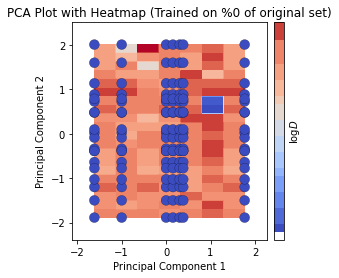

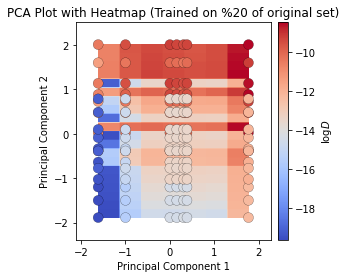

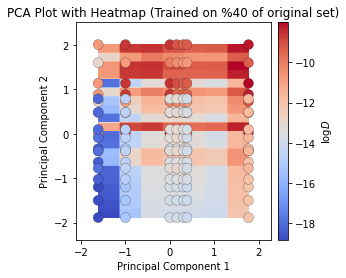

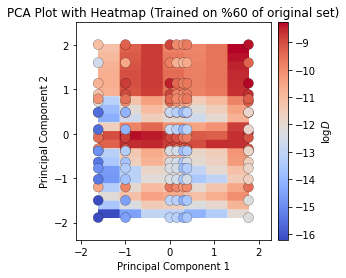

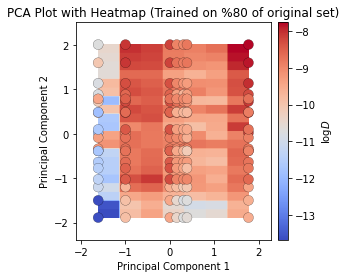

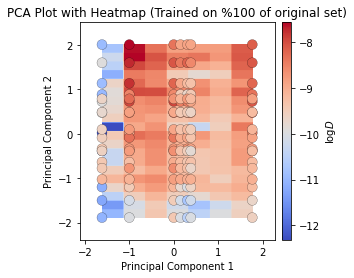

In [32]:
numbers_list = list(range(0, 111, 20))
OrderRandom = False

# Loop through each number in the list, which corresponds to a percentage of the training set
for number in numbers_list:
    # Get the PCA data for the current number
    pca_df = extract_pca_data_space(get_exhaustive_search_data(), "co2", get_trained_model("./TrainData.xlsx", OrderRandom, number))
    
    # Generate and save the PCA plot for the current number
    if OrderRandom:
        plot_pca_data(pca_df, f'Random - Trained on %{number} of original set', OrderRandom, number)
    else:
        plot_pca_data(pca_df, f'Researcher - Trained on %{number} of original set', OrderRandom, number)

# Define the Final Function: run'n'plot

In [67]:
def run_n_plot(order: bool, step= 20):
    numbers_list = list(range(0, 111, step))
    OrderRandom = order

    # Loop through each number in the list, which corresponds to a percentage of the training set
    for number in numbers_list:
        # Get the PCA data for the current number
        pca_df = extract_pca_data_space(get_exhaustive_search_data(), "co2", get_trained_model("./TrainData.xlsx", OrderRandom, number))
        
        # Generate and save the PCA plot for the current number
        # Generate and save the PCA plot for the current number
        if OrderRandom:
            plot_pca_data(pca_df, f'Random - Trained on %{number} of original set', OrderRandom, number)
        else:
            plot_pca_data(pca_df, f'Researcher - Trained on %{number} of original set', OrderRandom, number)

In [ ]:
run_n_plot(False, 20)

# Ploting all in a common figure

Number of unique rows in df: 140
[11:09:43] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[11:09:43] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[11:09:43] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[11:09:43] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[11:09:43] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[11:09:43] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[11:09:43] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[11:09:43] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[11:09:43] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[11:09:43] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[11:09:43] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[11:09:43] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[11:09:43] WARNING: ../src/learner.cc:1265: Empty dataset at worker: 0
[11:09:43] WARNING: ../src/learner.cc:1265: 

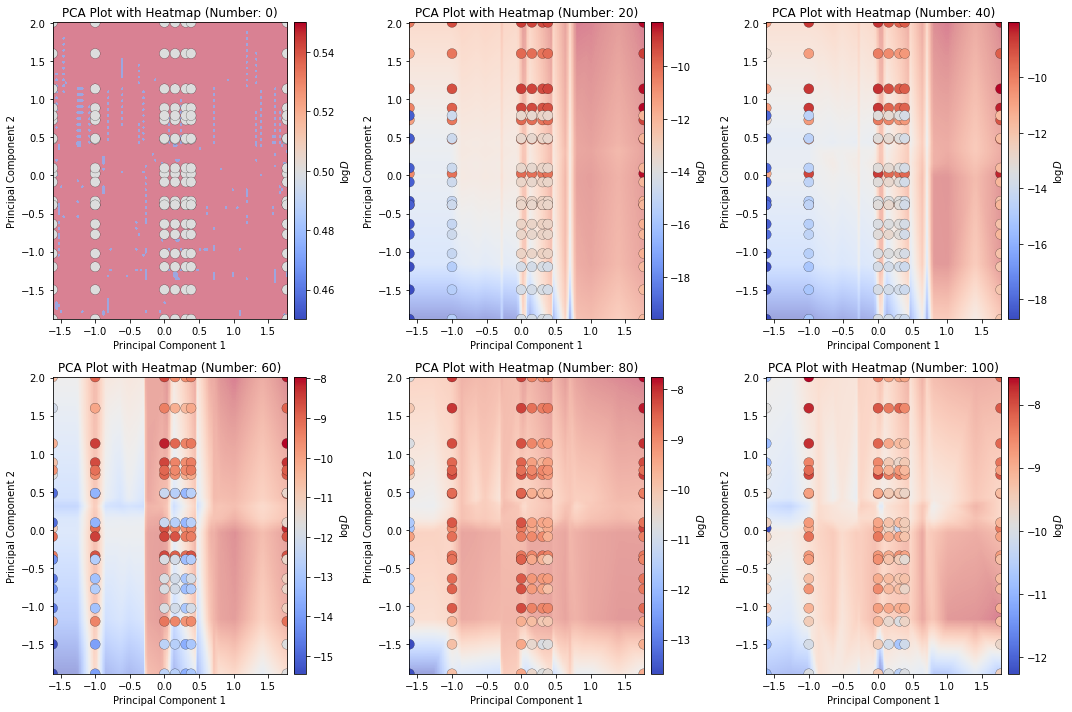

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import griddata

numbers_list = list(range(0, 111, 20))
OrderRandom = False

# Create a common figure with subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Loop through each number in the list, which corresponds to a percentage of the training set
for i, number in enumerate(numbers_list):
    # Get the PCA data for the current number
    pca_df = extract_pca_data_space(get_exhaustive_search_data(), "co2", get_trained_model("./TrainData.xlsx", OrderRandom, number))

    # Generate the PCA plot for the current number
    pca_array = pca_df[['PC1', 'PC2']].values
    output_property = pca_df['output'].values

    # Generate a grid for interpolation
    x_grid, y_grid = np.meshgrid(np.linspace(pca_array[:, 0].min(), pca_array[:, 0].max(), 100),
                                 np.linspace(pca_array[:, 1].min(), pca_array[:, 1].max(), 100))
    points = pca_array
    values = output_property
    interpolated_values = griddata(points, values, (x_grid, y_grid), method='linear')

    # Plot the scatter plot of PCA axes with larger point size
    scatter = axs[i // 3, i % 3].scatter(pca_array[:, 0], pca_array[:, 1], c=output_property, cmap='coolwarm', s=100, linewidths=0.2, edgecolors='black')
    axs[i // 3, i % 3].imshow(interpolated_values.T, extent=(pca_array[:, 0].min(), pca_array[:, 0].max(),
                                                             pca_array[:, 1].min(), pca_array[:, 1].max()),
                             aspect='auto', origin='lower', alpha=0.5, cmap='coolwarm')

    # Set the labels and title
    axs[i // 3, i % 3].set_xlabel('Principal Component 1')
    axs[i // 3, i % 3].set_ylabel('Principal Component 2')
    axs[i // 3, i % 3].set_title(f'PCA Plot with Heatmap (Number: {number})')

    # Create a colorbar
    divider = make_axes_locatable(axs[i // 3, i % 3])
    cax = divider.append_axes('right', size='5%', pad=0.1)
    cbar = plt.colorbar(scatter, cax=cax, label='log$D$', ax=axs[i // 3, i % 3])

# Adjust spacing between subplots
plt.tight_layout()

# Save the common figure
plt.savefig('PCA_Plots_Common.png', bbox_inches='tight', dpi=300)

# Show the common figure
plt.show()

In [51]:
0^1

1

In [52]:
1^1

0

In [53]:
1^1^0

0